
# 3.2 Assignment: Using Data to Improve a Marketing Promotion - Python

For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:

- Box plots
- Scatter plots
- Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import datetime

# Importing the Data

In [2]:
df = pd.read_csv("dodgers.csv")
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


The data in this dataset contains information for 81 Dodgers Games. Since the goal of the project will be to determine which attributes increase attendance, we can assume that this data is from the Dodgers home stadium. 

The attributes are as follows:
- month : Month the game was in (categorical)
- day : day the game was (integer)
- attend : number of attendance (integer)
- day_of_week : Day of the week the game was held (categorical)
- opponent : The opposing team (categorical)
- temp : Atmospheric temperature (F) (integer)
- skies : Weather at the time of the event. Clear/Cloudy (categorical)
- day_night : Time of day the game was (day/night) (categorical)
- cap : If hats were sold at the game (Yes/No) (categorical)
- shirt : If shirts were sold at the game (Yes/No) (categorical)
- fireworks : If fireworks were used at the game (Yes/No) (categorical)
- bobblehead : If bobbleheads were sold at the game (Yes/No) (categorical)

# Exploratory Data Analysis

First, we can check the breakdown of how many games we can expect throughout the baseball season and how they are distributed between each month

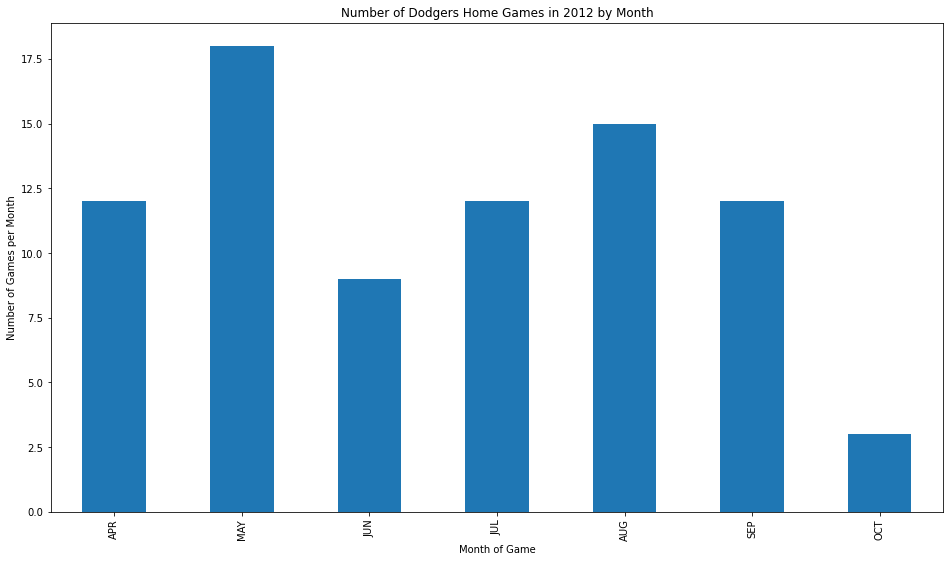

In [3]:
df.groupby('month').describe()['day']['count'].reindex(
    ['APR','MAY','JUN','JUL','AUG','SEP','OCT']).plot(kind='bar', figsize = (16,9))
plt.xlabel("Month of Game")
plt.ylabel("Number of Games per Month")
plt.title("Number of Dodgers Home Games in 2012 by Month")
plt.show()

We can check the attendance of each month visually by using a boxplot

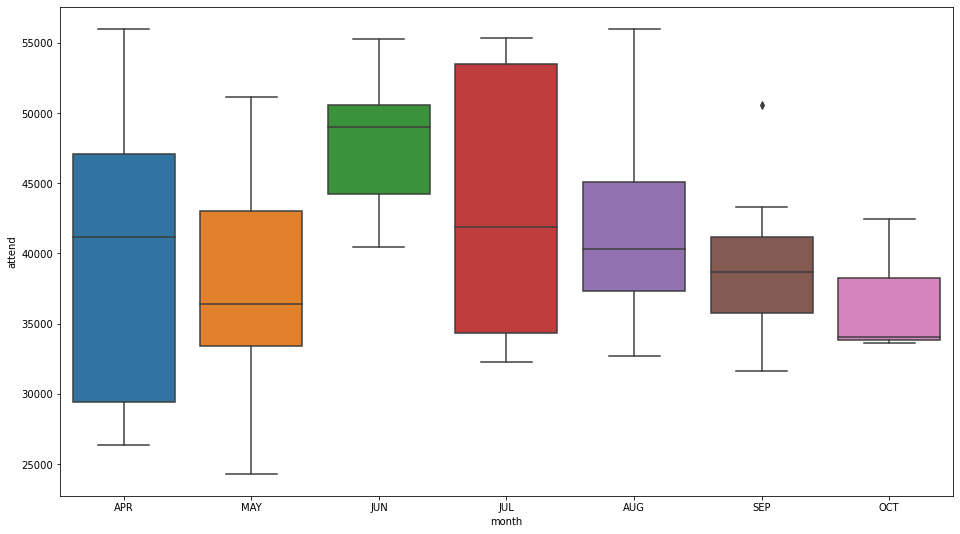

In [4]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['month'], y = df['attend'], order=df['month'].unique())
plt.show()

From this graph, we can see that June has the highest attendance with the lowest variance.

We can perform similar statistics on the day of the week our games were on.

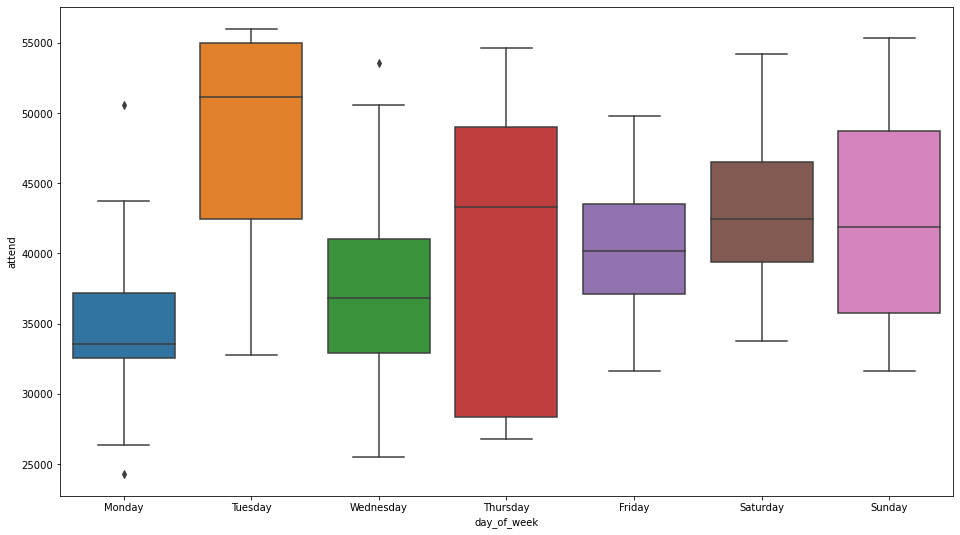

In [5]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['day_of_week'], y = df['attend'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

Tuesdays seem to be the most popular day of the week to catch a game. 
We can also check to see if weather impacts our attendance

Text(0, 0.5, 'Attenance')

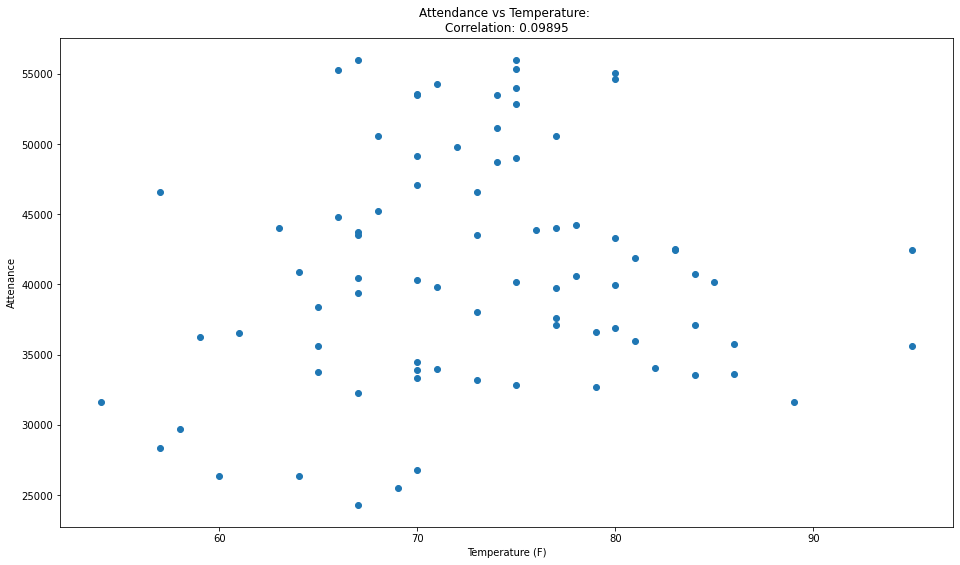

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(df['temp'], df['attend'])
plt.title(f"Attendance vs Temperature: \nCorrelation: {df['temp'].corr(df['attend']):.5f}")
plt.xlabel("Temperature (F)")
plt.ylabel("Attenance")

There is a very low correaltion between temperature and attenance, so it isn't very likely that it impacts attenance

This can also been seen by checking whether or not the skies were clear or cloudy

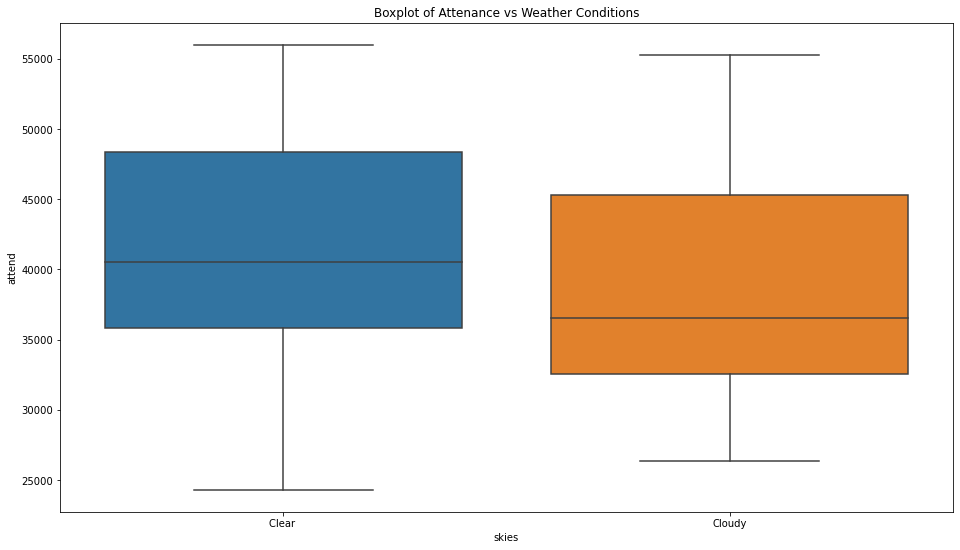

In [7]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['skies'], y = df['attend'], order=df['skies'].unique())
plt.title("Boxplot of Attenance vs Weather Conditions")
plt.show()

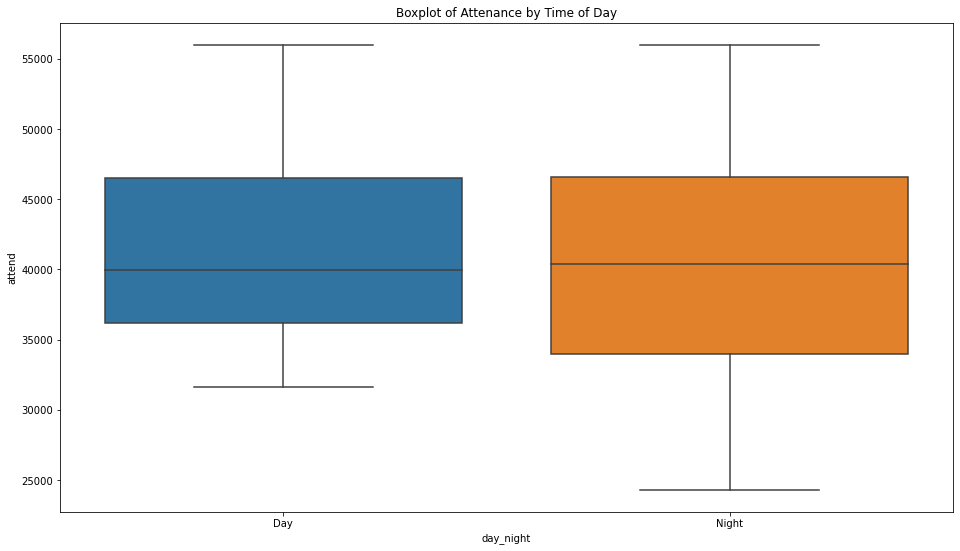

In [8]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['day_night'], y = df['attend'])
plt.title("Boxplot of Attenance by Time of Day")
plt.show()

Now that we've established some of the issues out of our control, we can analyze some of the attributes we can alter. By selling different products at different games, we can see which is more likely to increase attenance.

Hats don't really seem like the best item to sell at these games to increase attendance. Average attenance actually was lower when caps weren't sold.

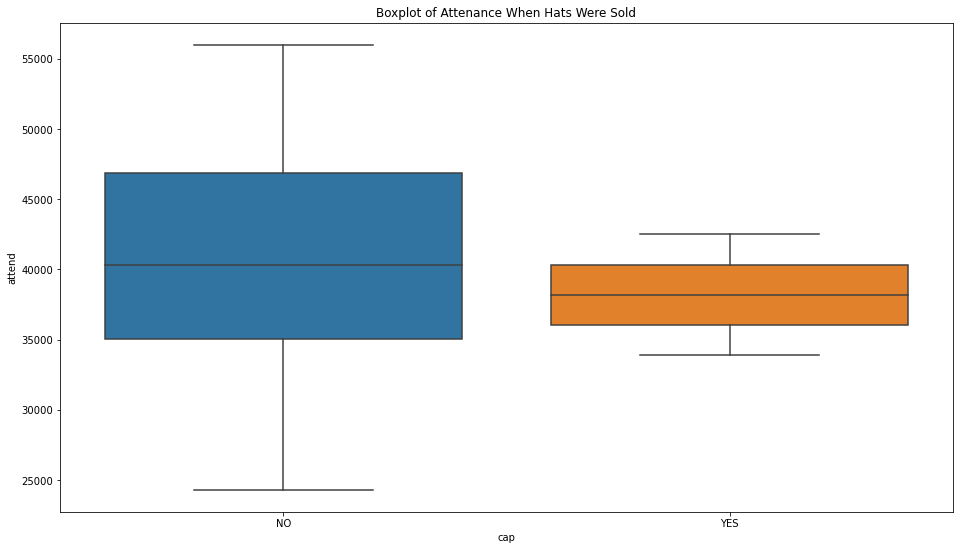

In [9]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['cap'], y = df['attend'])
plt.title("Boxplot of Attenance When Hats Were Sold")
plt.show()

Fireworks don't really seem to have that much of an impact on attenance. Fireworks are primarily used on Fridays as well. 

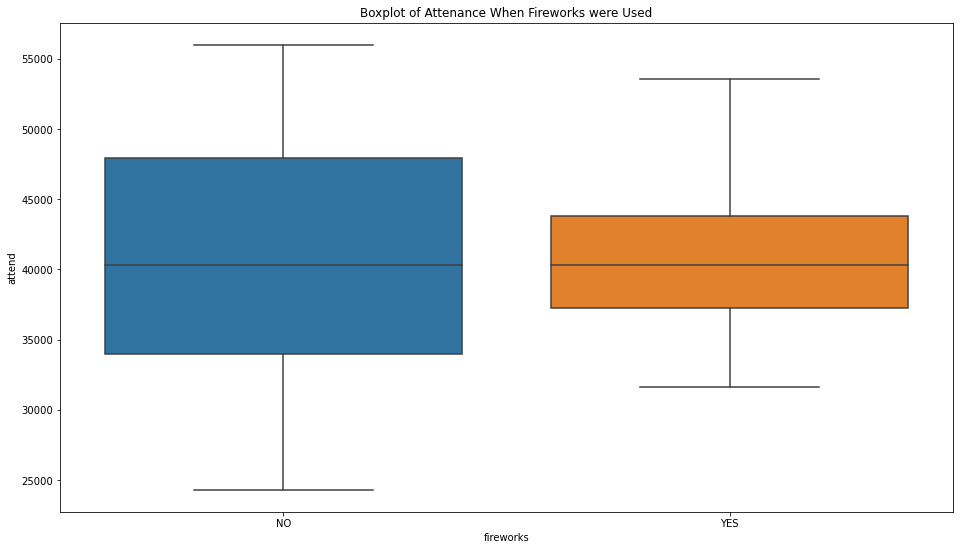

In [10]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['fireworks'], y = df['attend'])
plt.title("Boxplot of Attenance When Fireworks were Used")
plt.show()

Shirts on the other hand do have an impact on attenance. When shirts were sold, attenance was significantly higher. We can see this visually from our boxplot.

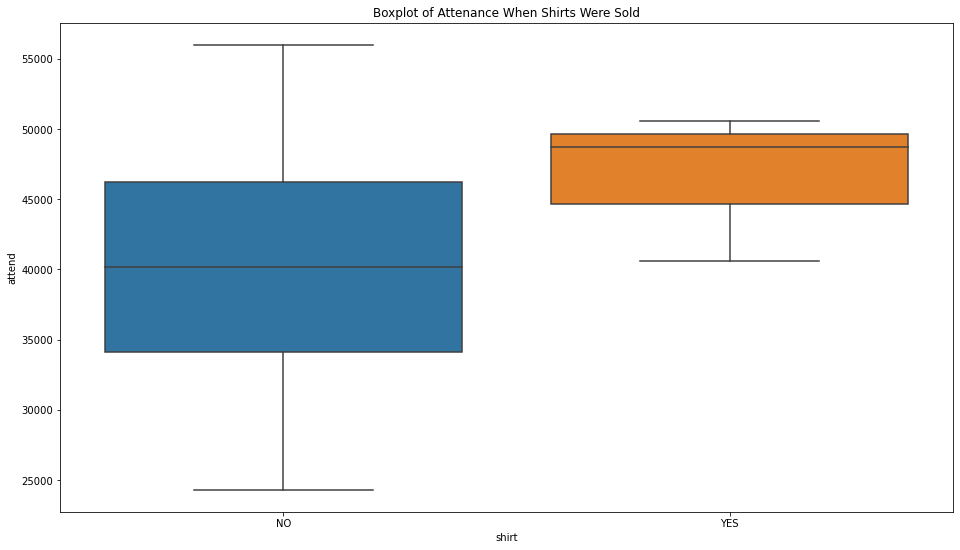

In [11]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['shirt'], y = df['attend'])
plt.title("Boxplot of Attenance When Shirts Were Sold")
plt.show()

Lastly, we can see the impact that selling bobbleheads at the games. From the data we have, we can see a large increase in attenance when bobbleheads are sold. 

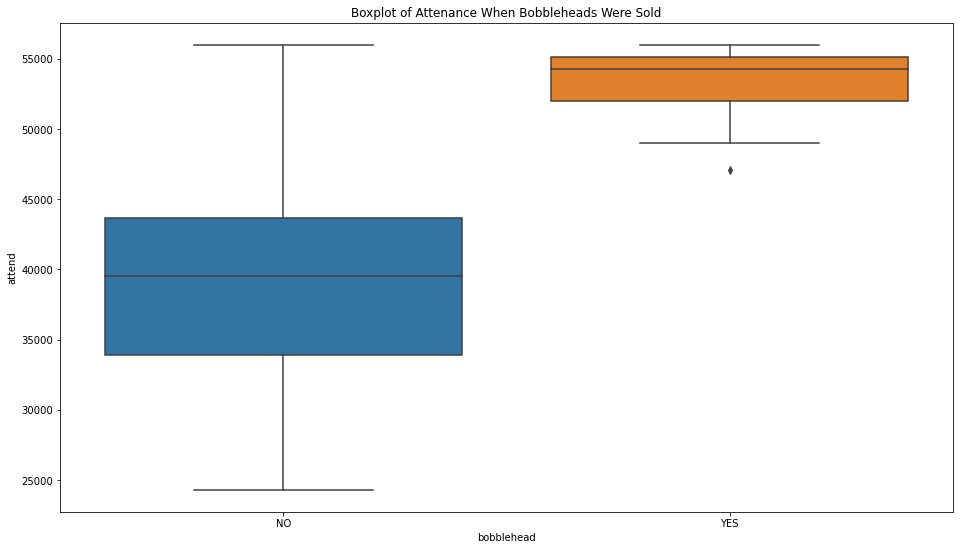

In [12]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['bobblehead'], y = df['attend'])
plt.title("Boxplot of Attenance When Bobbleheads Were Sold")
plt.show()

# Creating a Regression Model

First, we will need to convert the categorical values in our dataframe into dummy variables.

In [13]:
df = pd.get_dummies(df)

We can check the correlations between all the items now that they are all numeric. We can see strong correlations between bobbleheads and attenance from this graphic, as well as a strong correlation with fireworks and Friday

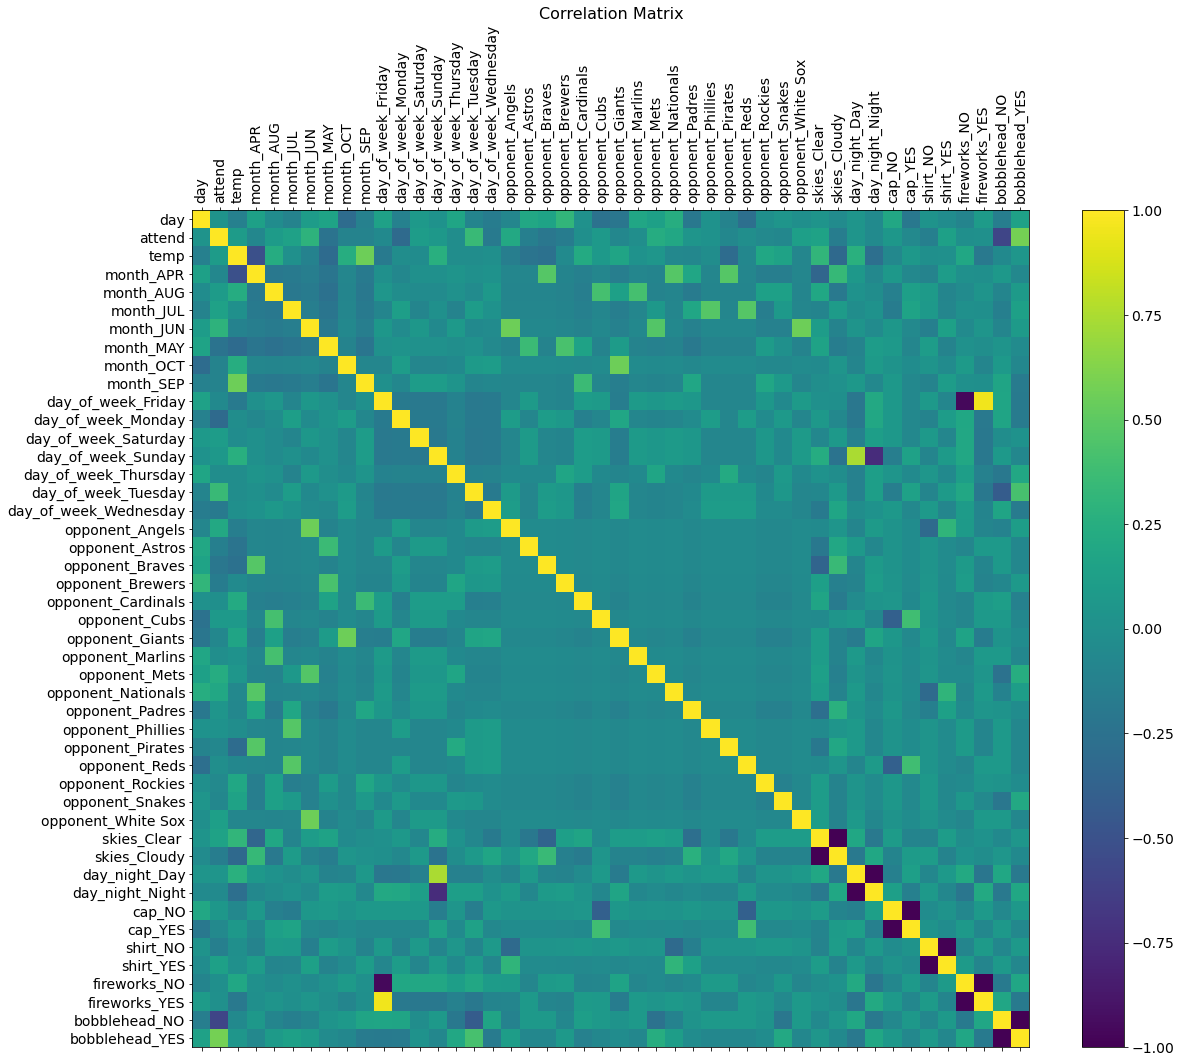

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

We can now make a linear regression model to determine which attributes impact our attenance and in what way

In [15]:
import statsmodels.api as sm

df['intercept'] = 1

model = sm.OLS(df['attend'],df[['intercept','shirt_YES', 'cap_YES', 'fireworks_YES', 'bobblehead_YES']])

lm = model.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     12.01
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.29e-07
Time:                        20:28:15   Log-Likelihood:                -825.51
No. Observations:                  81   AIC:                             1661.
Df Residuals:                      76   BIC:                             1673.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        3.82e+04    933.092     40.940      0.000    3.63e+04    4.01e+04
shirt_YES       8442.5882   3958.774      2.133      0.036     558.006    1.63e+04
cap_YES          -11.5784   4803.385     -0.002      0.998   -9578.349    9555.193
fireworks_YES   2876.7787   2010.561      1.431      0.157   -1127.600    6881.157
bobblehead_YES  1.494e+04   2215.256      6.746      0.000    1.05e+04    1.94e+04
==============================================================================
Omnibus:                        2.216   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.632
Skew:                           0.329   Prob(JB):                        0.442
Kurtosis:                       3.226   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our linear regression model, we can see that quite a few attributes have a high impact on our attenance. Our attribute with the highest coefficient and significant p-value is our bobblehead attribute. Bobblehead sales seem to be effective in increasing the attendance at our games. We can 14943 more people to come to our games on avearge when bobbleheads are sold. Our second highest coefficient with a significant p-value is shirt sales. Shirts tend to bring in 8442 more attendents on average. Our other attributes aren't significant enough to worry about. 

In conclusion, the best goods to sell at our games are shirts and bobbleheads.